In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DATA_PATH = os.path.join('data')
INPUT_CSV = os.path.join(DATA_PATH,'input','medical_cost','Medical_Cost.csv')
OUTPUT_CSV = os.path.join(DATA_PATH,'output','medical_cost_with_missing.csv')
Y_COLUMN = 'charges'
NAN_COLUMN = 'smoker'
NAN_RATE = 0.005

In [3]:
df_medical = pd.read_csv(INPUT_CSV, index_col=None)
pd.concat([df_medical.head(),df_medical.tail()])

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [4]:
# 特定カラムにのみ一定数の欠損値を追加
df_medical2 = df_medical.copy()
mask = np.random.rand(len(df_medical2)) < NAN_RATE
df_medical2.loc[mask, NAN_COLUMN] = np.nan

In [5]:
df_medical2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1334 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# カテゴリカル変数の設定
for category_column in ['sex','smoker','region']:
    df_medical2[category_column] = df_medical2[category_column].astype('category')
    print(df_medical2[category_column].value_counts())

sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1061
yes     273
Name: count, dtype: int64
region
southeast    364
northwest    325
southwest    325
northeast    324
Name: count, dtype: int64


In [7]:
df_medical2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1334 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [8]:
df_medical2.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      4
region      0
charges     0
dtype: int64

In [9]:
# データの保存（オプション）
df_medical2.to_csv(OUTPUT_CSV)

In [10]:
df_medical2.columns.to_list()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [11]:
df_medical3 = df_medical2.dropna(how='any')
pd.concat([df_medical3.head(),df_medical3.tail()])

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [12]:
df_medical3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1334 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1334 non-null   int64   
 1   sex       1334 non-null   category
 2   bmi       1334 non-null   float64 
 3   children  1334 non-null   int64   
 4   smoker    1334 non-null   category
 5   region    1334 non-null   category
 6   charges   1334 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 56.5 KB


In [13]:
df_medical3.describe()

,age,bmi,children,charges
count,1334.000000,1334.000000,1334.000000,1334.000000
mean,39.228636,30.665109,1.090705,13270.782876
std,14.054637,6.106194,1.201407,12122.445726
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.237500,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.700000,2.000000,16584.318157
max,64.000000,53.130000,5.000000,63770.428010


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

X = df_medical3.iloc[:, :-1]
y = df_medical3.iloc[:, -1]

categories = X.columns[X.dtypes == 'category'].tolist()
print(categories)

for cat in categories:
    le = LabelEncoder()
    le = le.fit(X[cat])
    X[cat] = le.transform(X[cat])
    X[cat] = X[cat].astype('category')

X

['sex', 'smoker', 'region']


,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(max_depth=5)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

#print(y_pred)
print(r2_score(y_test, y_pred))

0.8697018160638081


In [16]:
y_test.head()

902      4661.28635
1066     8978.18510
1256    11436.73815
299      9249.49520
238     17352.68030
Name: charges, dtype: float64

In [17]:
y_pred

array([ 7490.25088795, 11424.93451913, 12093.59368443, 11532.20963895,
       19577.91313085, 11367.85095815,  8546.02876792, 15690.71140815,
       19167.32720641,  7624.86055561,  8106.46716979, 14242.05294777,
       41439.2954625 ,  4130.22151798, 15561.39853964, 38245.26307068,
        7830.99066482,  2581.16162462,  4130.22151798,  2505.11673597,
       12116.28056359,  7062.03994438, 10673.73404911,  9655.17740174,
        8848.34941185, 26732.59636071,  7777.01304723, 12216.4020932 ,
        7482.12291761, 11847.44072647, 43370.46997236,  6097.52047999,
       11578.10193188,  7962.27708641,  5194.71596124, 19410.12995577,
       14439.86598983, 34696.95394426,  7243.79638068,  5039.71565283,
        6583.45870063,  2694.62672884, 10311.45260392,  6458.22382894,
       10781.39809479, 22240.85130727, 14773.84230089, 13707.2202773 ,
       17748.44974985, 11620.71206092, 13798.47439233, 12608.99323406,
        2347.98460496, 19722.45068947,  6594.26879046, 44279.9583943 ,
      

In [18]:
df_pred = pd.DataFrame(y_test)
df_pred['y_pred'] = y_pred
df_pred.head()

,charges,y_pred
902,4661.28635,7490.250888
1066,8978.18510,11424.934519
1256,11436.73815,12093.593684
299,9249.49520,11532.209639
238,17352.68030,19577.913131


Text(0, 0.5, 'pred')

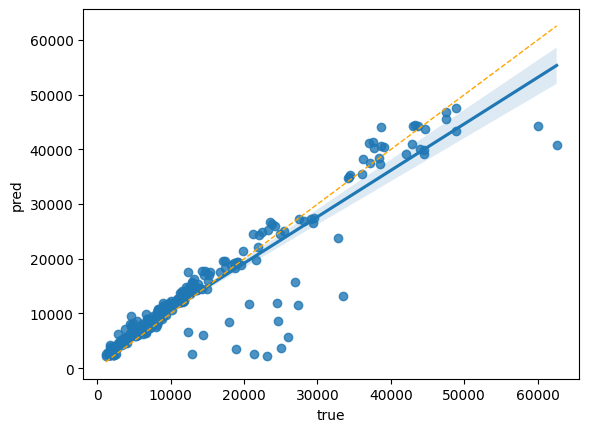

In [19]:
ax = plt.gca()

# 傾き1の直線を追加
a_line=[df_pred[Y_COLUMN].min(), df_pred[Y_COLUMN].max()]
sns.regplot(x=df_pred[Y_COLUMN], y=df_pred.y_pred)
sns.regplot(x=a_line, y=a_line,ci=None, scatter=False, line_kws={'color': 'orange', 'linestyle': '--', 'lw': 1})

ax.set_xlabel('true')
ax.set_ylabel('pred')

- カテゴリカル変数を含んでいる点はgood
- 良い精度を持つモデルが出来ている点は良いと思う（決定係数で0.89）

## OneHotEncodingを試す

In [20]:
X2_train = pd.get_dummies(X_train, columns=categories)
X2_test = pd.get_dummies(X_test, columns=categories)

rf_model = RandomForestRegressor(max_depth=3)
rf_model.fit(X2_train, y_train)
y_pred = rf_model.predict(X2_test)

#print(y_pred)
print(r2_score(y_test, y_pred))

0.8732862730991857


# 外れ値を除去してみる

<Axes: >

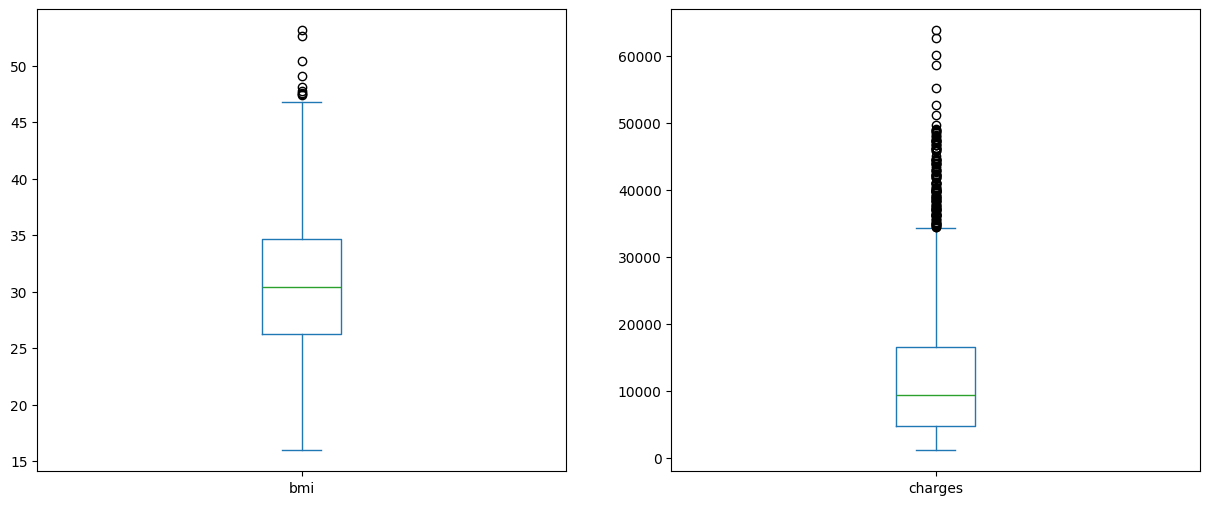

In [21]:
# 箱ひげ図の表示
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
df_medical3['bmi'].plot.box(ax=axes[0])
df_medical3['charges'].plot.box(ax=axes[1])

<Axes: >

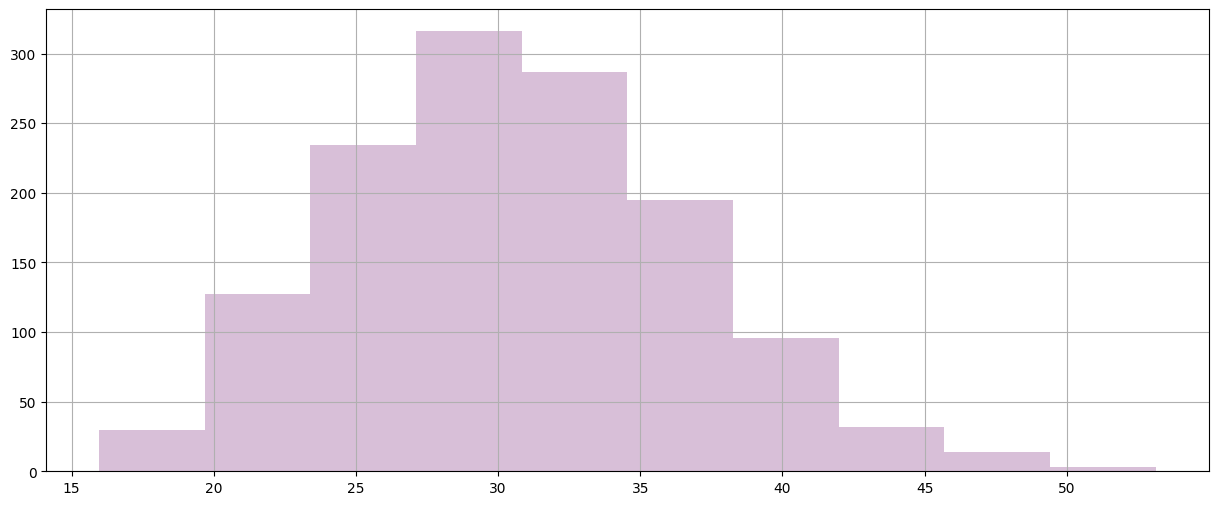

In [22]:
# ヒストグラムの表示
fig, axes = plt.subplots(figsize=(15, 6))
df_medical3['bmi'].hist(color='thistle', ax=axes)

<Axes: >

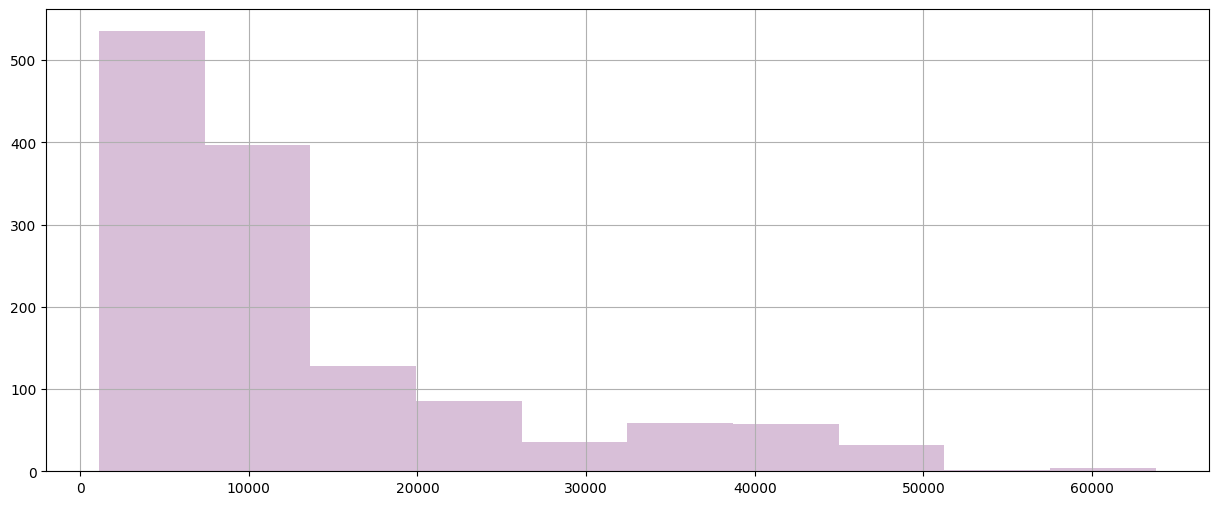

In [23]:
fig, axes = plt.subplots(figsize=(15, 6))
df_medical3['charges'].hist(color='thistle', ax=axes)

- べき分布だから外れ値があるのが当たり前という感じ。。。

In [24]:
bmi_mean = df_medical3['bmi'].mean()
bmi_median = df_medical3['bmi'].median()
bmi_sigma = df_medical3['bmi'].std()

bmi_mean, bmi_median, bmi_sigma

(np.float64(30.665108695652176),
 np.float64(30.4),
 np.float64(6.106194348510765))

- 中央値と平均値がほぼ同じ

In [25]:
df_medical3[df_medical3['bmi'] > (bmi_median+2.5*bmi_sigma)]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
438,52,female,46.75,5,no,southeast,12592.53450
454,32,male,46.53,2,no,southeast,4686.38870
543,54,female,47.41,0,yes,southeast,63770.42801
547,54,female,46.70,2,no,southwest,11538.42100
549,43,female,46.20,0,yes,southeast,45863.20500
660,37,male,46.53,3,no,southeast,6435.62370
847,23,male,50.38,1,no,southeast,2438.05520


In [26]:
charges_mean = df_medical3['charges'].mean()
charges_median = df_medical3['charges'].median()
charges_sigma = df_medical3['charges'].std()

charges_mean, charges_median, charges_sigma

(np.float64(13270.782875606446),
 np.float64(9382.033),
 np.float64(12122.44572636818))

- 中央値と平均値がかなり離れてますね

In [38]:
outlier_charges = df_medical3[df_medical3['charges'] > (charges_median+3*charges_sigma)].sort_values('charges')
print(len(outlier_charges))
pd.concat([outlier_charges.head(),outlier_charges.tail()])

35


,age,sex,bmi,children,smoker,region,charges
549,43,female,46.200,0,yes,southeast,45863.20500
860,37,female,47.600,2,yes,southwest,46113.51100
677,60,male,31.350,3,yes,northwest,46130.52650
265,46,male,42.350,3,yes,southeast,46151.12450
674,44,female,43.890,2,yes,southeast,46200.98510
819,33,female,35.530,0,yes,northwest,55135.40209
577,31,female,38.095,1,yes,northeast,58571.07448
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309
543,54,female,47.410,0,yes,southeast,63770.42801


- 3σを超える値もかなり多いです

In [32]:
df_medical4 = df_medical3[(df_medical3['bmi'] < (bmi_median+3*bmi_sigma)) & (df_medical3['charges'] < (charges_median+3*charges_sigma))]
df_medical4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1295 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1295 non-null   int64   
 1   sex       1295 non-null   category
 2   bmi       1295 non-null   float64 
 3   children  1295 non-null   int64   
 4   smoker    1295 non-null   category
 5   region    1295 non-null   category
 6   charges   1295 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 54.8 KB


In [33]:
X5 = df_medical4.iloc[:,:-1]
y5 = df_medical4.iloc[:,-1]

for cat in categories:
    le = LabelEncoder()
    le = le.fit(X5[cat])
    X5[cat] = le.transform(X5[cat])
    X5[cat] = X5[cat].astype('category')
    print(X5[cat].value_counts())

X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3, random_state=42)

rf_model = RandomForestRegressor(max_depth=5)
rf_model.fit(X5_train, y5_train)
y_pred = rf_model.predict(X5_test)

#print(y_pred)
print(r2_score(y5_test, y_pred))

sex
1    650
0    645
Name: count, dtype: int64
smoker
0    1058
1     237
Name: count, dtype: int64
region
2    345
1    318
0    317
3    315
Name: count, dtype: int64
0.8222417321985873


- やっぱり下がる＾＾；